In [2]:
import numpy as np
from pathlib import Path

from pymor.basic import *
from pymor.core.pickle import load

from RBInvParam.problems.problems import build_InstationaryModelIP

set_log_levels({
    'pymor' : 'WARN'
})

set_defaults({})


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cm",
    "font.size": 10,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'figure.dpi': 400
})

In [15]:
WORK_DIR = Path('/home/benedikt/Dokumente/parabolische_inverse_probleme')
data_dir_path = WORK_DIR / Path('experiments/initial_testing_palma')

FOM_data_path = data_dir_path / 'reaction_FOM_100'
TR_data_path = data_dir_path / 'reaction_TR_100'

setup_path = FOM_data_path / 'setup.pkl'
optimizer_parameter_path = FOM_data_path / 'optimizer_parameter.pkl'


with open(setup_path, 'rb') as file:
    setup = load(file)

with open(optimizer_parameter_path, 'rb') as file:
    optimizer_parameter = load(file)

if not 'FOM' in locals():
    FOM = build_InstationaryModelIP(setup=setup)

    

data = {}

if FOM_data_path:
    with open(FOM_data_path / 'FOM_IRGNM_final.pkl', 'rb') as file:
        FOM_data = load(file)
    data['FOM'] = FOM_data

if TR_data_path:
    with open(TR_data_path / 'TR_IRGNM_final.pkl', 'rb') as file:
        TR_data = load(file)
    data['TR'] = TR_data
    


In [11]:
print("Total runtime:")

times = {}

for name, d in data.items():
    times[name] = int(np.ceil(d['total_runtime']))

    if name == 'FOM':
        speed_up_str = ' | --'
    if name == 'TR':
        speed_up = times['FOM'] / times['TR'] 
        speed_up_str = f' | {speed_up:3.3}'
    

    print(f"{name} : {times[name]}s" + speed_up_str)

Total runtime:
FOM : 7838s | --
TR : 228s | 34.4


In [16]:
val = data['TR']['q'][-1]
rel = data['FOM']['q'][-1]

if setup['model_parameter']['q_time_dep']:
    x = FOM.products['bochner_prod_Q'].apply2(rel-val, rel-val)[0,0]
    y = FOM.products['bochner_prod_Q'].apply2(rel, rel)[0,0]
else:
    x = FOM.products['prod_Q'].apply2(rel-val, rel-val)[0,0]
    y = FOM.products['prod_Q'].apply2(rel, rel)[0,0]
    
z = np.sqrt(x) / np.sqrt(y) * 100
print(f"{z:3.4} %")

4.017 %


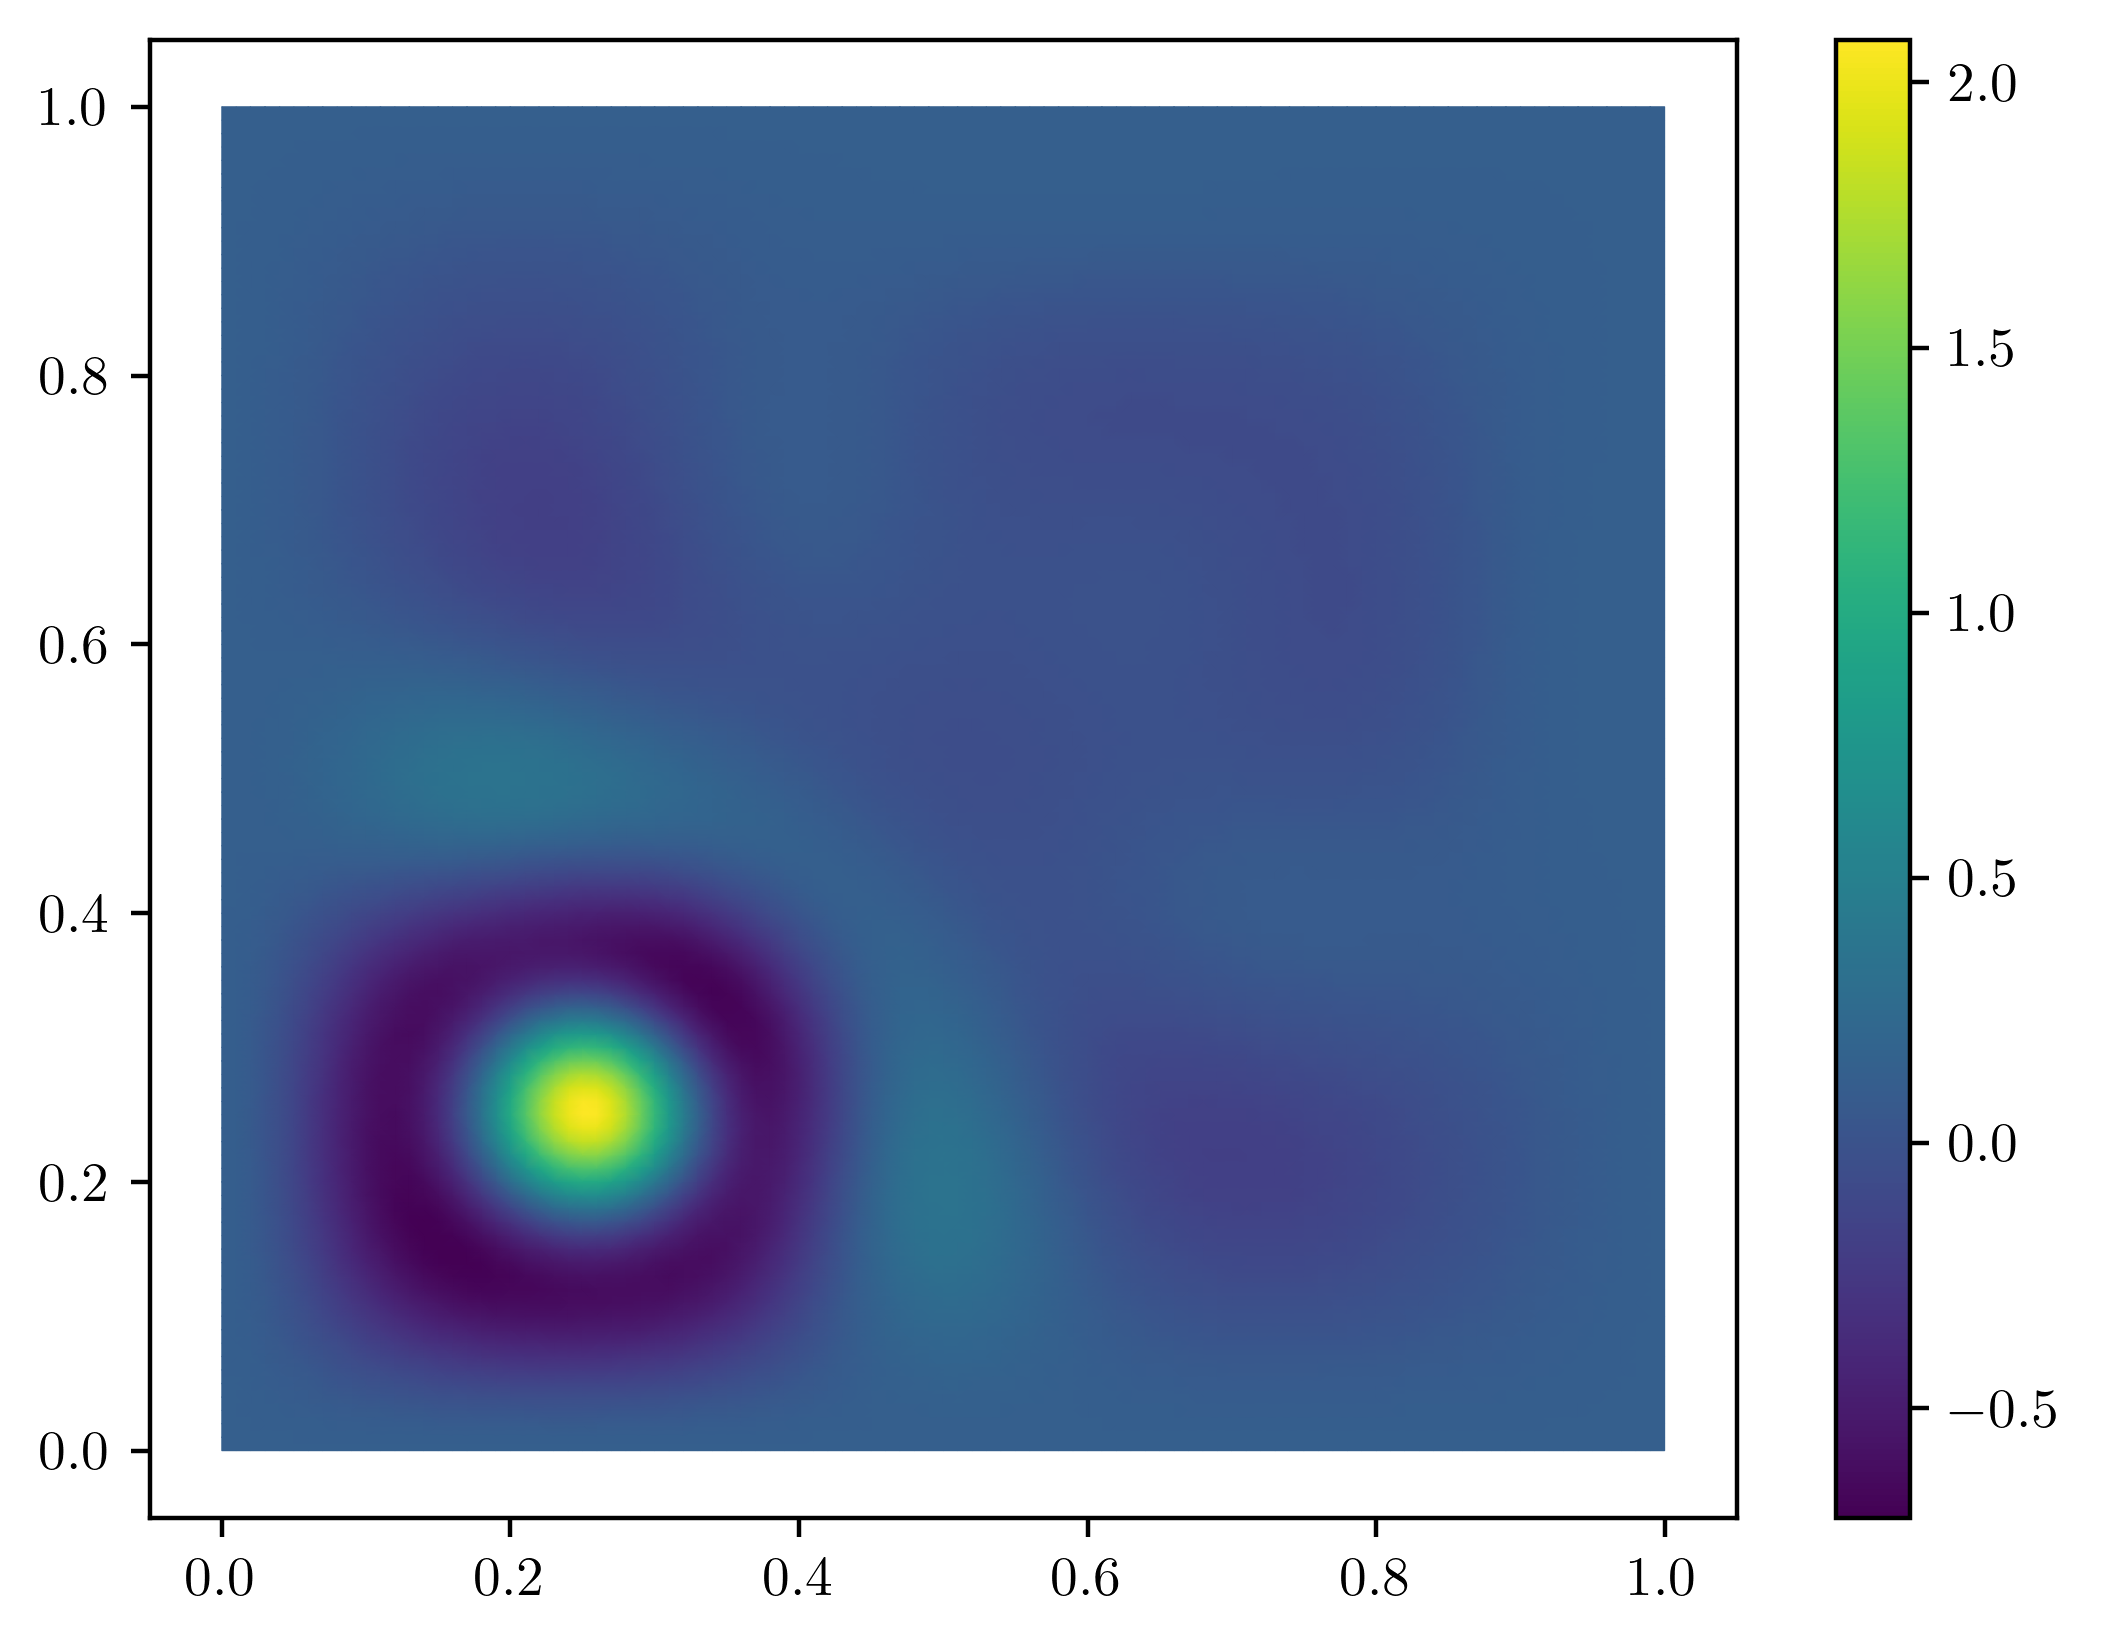

In [17]:
FOM.visualizer.visualize(data['FOM']['q'][-1] - data['TR']['q'][-1])